In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

np.random.seed(2023)

# To Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

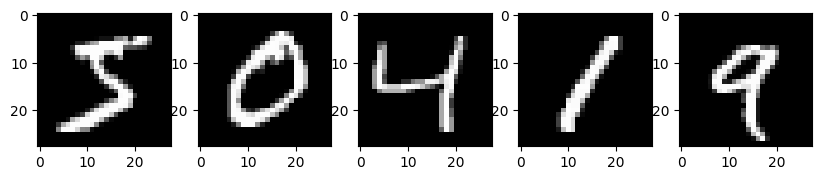

In [5]:
# To Plot the first 5 images of x_train
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10, 2))
for i in range(5):
    ax[i].imshow(x_train[i], cmap='gray')
plt.show()

# To Flatten the inputs
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

# To Convert datatype to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
# To Normalize the ranges of values
x_train /= 255
x_test /= 255

# To Print the shapes of x_train and y_train after preprocessing
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (60000, 784)
y_train shape: (60000,)


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam

# To Define the neural network model
model_nn = Sequential()
model_nn.add(Dense(512, activation='relu', input_shape=(784,)))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(10, activation='softmax'))

# To Compile the model
model_nn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# To Train the neural network model
model_nn.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))



/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2809 - accuracy: 0.9197 - val_loss: 0.1350 - val_accuracy: 0.9592
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1233 - accuracy: 0.9636 - val_loss: 0.0951 - val_accuracy: 0.9716
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0837 - accuracy: 0.9754 - val_loss: 0.0837 - val_accuracy: 0.9735
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0640 - accuracy: 0.9808 - val_loss: 0.0698 - val_accuracy: 0.9779
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0512 - accuracy: 0.9843 - val_loss: 0.0675 - val_accuracy: 0.9786
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0414 - accuracy: 0.9873 - val_loss: 0.0609 - val_accuracy: 0.9798
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0559 - val_accuracy: 0.9821

In [13]:
# To Evaluate the neural network model on test data
loss, accuracy = model_nn.evaluate(x_test, y_test)
print('Neural Network Model Accuracy:', accuracy)

# To Define the random forest classifier model
model_rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=2023)

# To Train the random forest classifier model
model_rf.fit(x_train, y_train)

# To Evaluate the random forest classifier model on test data
y_pred = model_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Classifier Accuracy:', accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Random Forest Classifier Confusion Matrix:\n', conf_matrix)

313/313 [==============================] - 1s 3ms/step - loss: 0.0662 - accuracy: 0.9820
Neural Network Model Accuracy: 0.9819999933242798
Random Forest Classifier Accuracy: 0.9668
Random Forest Classifier Confusion Matrix:
 [[ 972    0    0    0    0    1    2    1    3    1]
 [   0 1122    2    4    1    2    2    0    1    1]
 [   6    0  996    7    3    0    4    8    8    0]
 [   1    0   13  966    0    9    0    9    8    4]
 [   1    0    1    0  951    0    5    1    3   20]
 [   3    1    0    9    3  862    7    1    4    2]
 [   8    3    2    0    5    4  933    0    3    0]
 [   1    5   20    2    4    0    0  978    3   15]
 [   5    0    6    7    3    6    5    3  927   12]
 [   4    6    1   12   11    4    1    3    6  961]]


In [14]:
# To Define the parameters for grid search
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}

# To Define the grid search model
model_gs = GridSearchCV(RandomForestClassifier(random_state=2023), param_grid, cv=5)

# To Train the grid search model
model_gs.fit(x_train, y_train)

# To Evaluate the grid search model on test data
y_pred = model_gs.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Grid Search Model Accuracy:', accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Grid Search Model Confusion Matrix:\n', conf_matrix)

Grid Search Model Accuracy: 0.9711
Grid Search Model Confusion Matrix:
 [[ 972    0    0    0    0    1    2    1    4    0]
 [   0 1123    2    3    0    2    3    0    1    1]
 [   6    0 1002    4    2    0    4    8    6    0]
 [   1    0    9  974    0    6    0    9    8    3]
 [   1    0    1    0  957    0    6    0    2   15]
 [   3    0    0   13    4  858    6    1    4    3]
 [   7    3    0    0    4    4  938    0    2    0]
 [   1    2   17    1    1    0    0  993    1   12]
 [   5    0    4    8    4    4    5    4  931    9]
 [   7    6    2    9   10    3    1    4    4  963]]


Neural Network Model performed best accuracy among all other models